In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles


Epoch [100/1000], Loss: 0.4427
Epoch [200/1000], Loss: 0.3511
Epoch [300/1000], Loss: 0.2921
Epoch [400/1000], Loss: 0.2512
Epoch [500/1000], Loss: 0.2212
Epoch [600/1000], Loss: 0.1983
Epoch [700/1000], Loss: 0.1801
Epoch [800/1000], Loss: 0.1654
Epoch [900/1000], Loss: 0.1532
Epoch [1000/1000], Loss: 0.1429


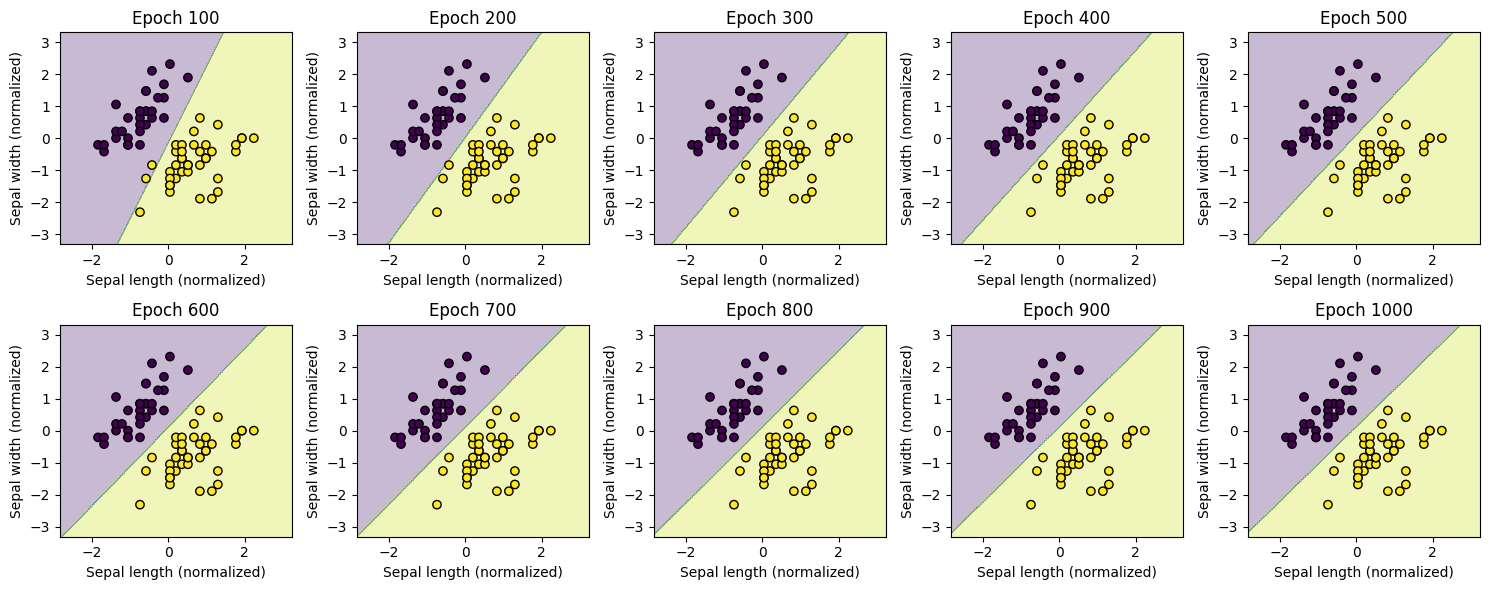

Test Accuracy: 100.00%


In [2]:
iris = load_iris()
X = iris.data
y = iris.target

# Only select classes 0 and 1 (binary classification problem)
X = X[y != 2, :2]  # Select sepal length and width (two features)
y = y[y != 2]  # Only classes 0 and 1

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=78)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=78)

X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_val_tensor = torch.FloatTensor(X_val)
y_val_tensor = torch.FloatTensor(y_val)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(2, 1)  # Linear layer with 2 input features and 1 output

    def forward(self, x):
        x = self.fc(x)
        return torch.sigmoid(x)  # Using sigmoid for binary classification

model = Perceptron()

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Prepare to plot in a 2x5 grid
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

# Modify plot_decision_boundary to accept an axis for plotting
def plot_decision_boundary(X, y, model, ax, epoch):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Predict on a grid of points
    grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
    Z = model(grid).detach().numpy()
    Z = (Z > 0.5).astype(int)  # Convert probabilities to binary predictions
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_xlabel('Sepal length (normalized)')
    ax.set_ylabel('Sepal width (normalized)')
    ax.set_title(f'Epoch {epoch}')

# Train the model and plot decision boundary after every 100 epochs
epochs = 1000
for epoch in range(epochs):
    model.train()

    # Forward pass
    outputs = model(X_train_tensor).squeeze()
    loss = criterion(outputs, y_train_tensor.float())

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

        model.eval()
        ax = axes[(epoch + 1) // 100 - 1]
        plot_decision_boundary(X_train, y_train, model, ax, epoch + 1)

plt.tight_layout()
plt.show()

model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor).squeeze()
    test_predictions = (test_outputs > 0.5).float()
    accuracy = (test_predictions == y_test_tensor.float()).sum().item() / len(y_test)
    print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch [100/1000], Loss: 0.6265
Epoch [200/1000], Loss: 0.6162
Epoch [300/1000], Loss: 0.6091
Epoch [400/1000], Loss: 0.6041
Epoch [500/1000], Loss: 0.6004
Epoch [600/1000], Loss: 0.5975
Epoch [700/1000], Loss: 0.5953
Epoch [800/1000], Loss: 0.5935
Epoch [900/1000], Loss: 0.5921
Epoch [1000/1000], Loss: 0.5910


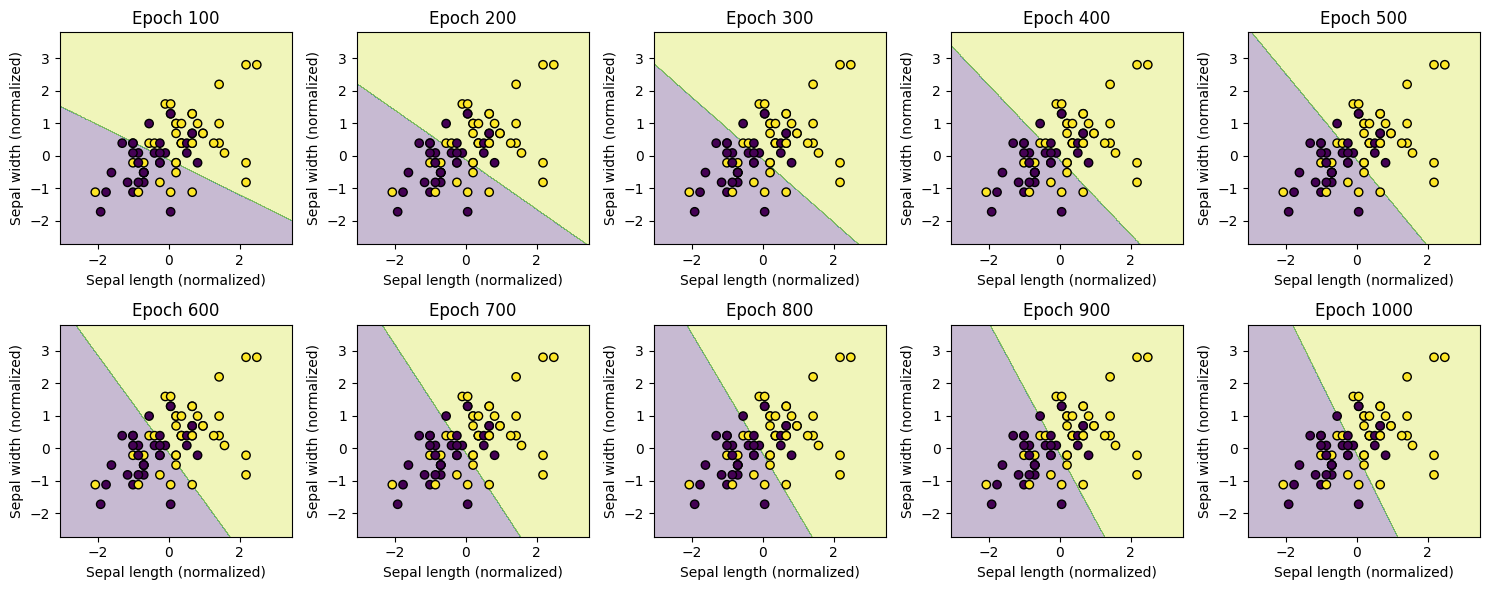

Validation Loss: 0.4871
Test Accuracy: 80.00%


In [3]:
iris = load_iris()
X = iris.data
y = iris.target

# Select only classes for Iris-versicolor and Iris-virginica
X = X[y != 0, :2]  # Select features sepal length and sepal width (two features)
y = y[y != 0]  # Only classes 1 and 2
y = np.where(y == 1, 0, 1)  # Change labels to 0 and 1 for two classes

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_val_tensor = torch.FloatTensor(X_val)
y_val_tensor = torch.FloatTensor(y_val)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(2, 1)  # Linear layer with 2 input features and 1 output

    def forward(self, x):
        return torch.sigmoid(self.fc(x))  # Use sigmoid for binary classification

# Instantiate the model
model = Perceptron()

criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = optim.SGD(model.parameters(), lr=0.01)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

def plot_decision_boundary(X, y, model, ax, epoch):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Predict on a grid of points
    grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
    Z = model(grid).detach().numpy()
    Z = (Z > 0.5).astype(int)  # Convert probabilities to binary predictions
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_xlabel('Sepal length (normalized)')
    ax.set_ylabel('Sepal width (normalized)')
    ax.set_title(f'Epoch {epoch}')

# 6. Train the model and plot decision boundary after every 100 epochs
epochs = 1000
for epoch in range(epochs):
    model.train()

    # Forward pass
    outputs = model(X_train_tensor).squeeze()
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

        model.eval()  # Set the model to evaluation mode for plotting
        ax = axes[(epoch + 1) // 100 - 1]
        plot_decision_boundary(X_train, y_train, model, ax, epoch + 1)

plt.tight_layout()
plt.show()

model.eval()
with torch.no_grad():
    val_outputs = model(X_val_tensor).squeeze()
    val_loss = criterion(val_outputs, y_val_tensor)
    print(f'Validation Loss: {val_loss.item():.4f}')

model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor).squeeze()
    test_predictions = (test_outputs > 0.5).float()
    accuracy = (test_predictions == y_test_tensor).sum().item() / len(y_test)
    print(f'Test Accuracy: {accuracy * 100:.2f}%')


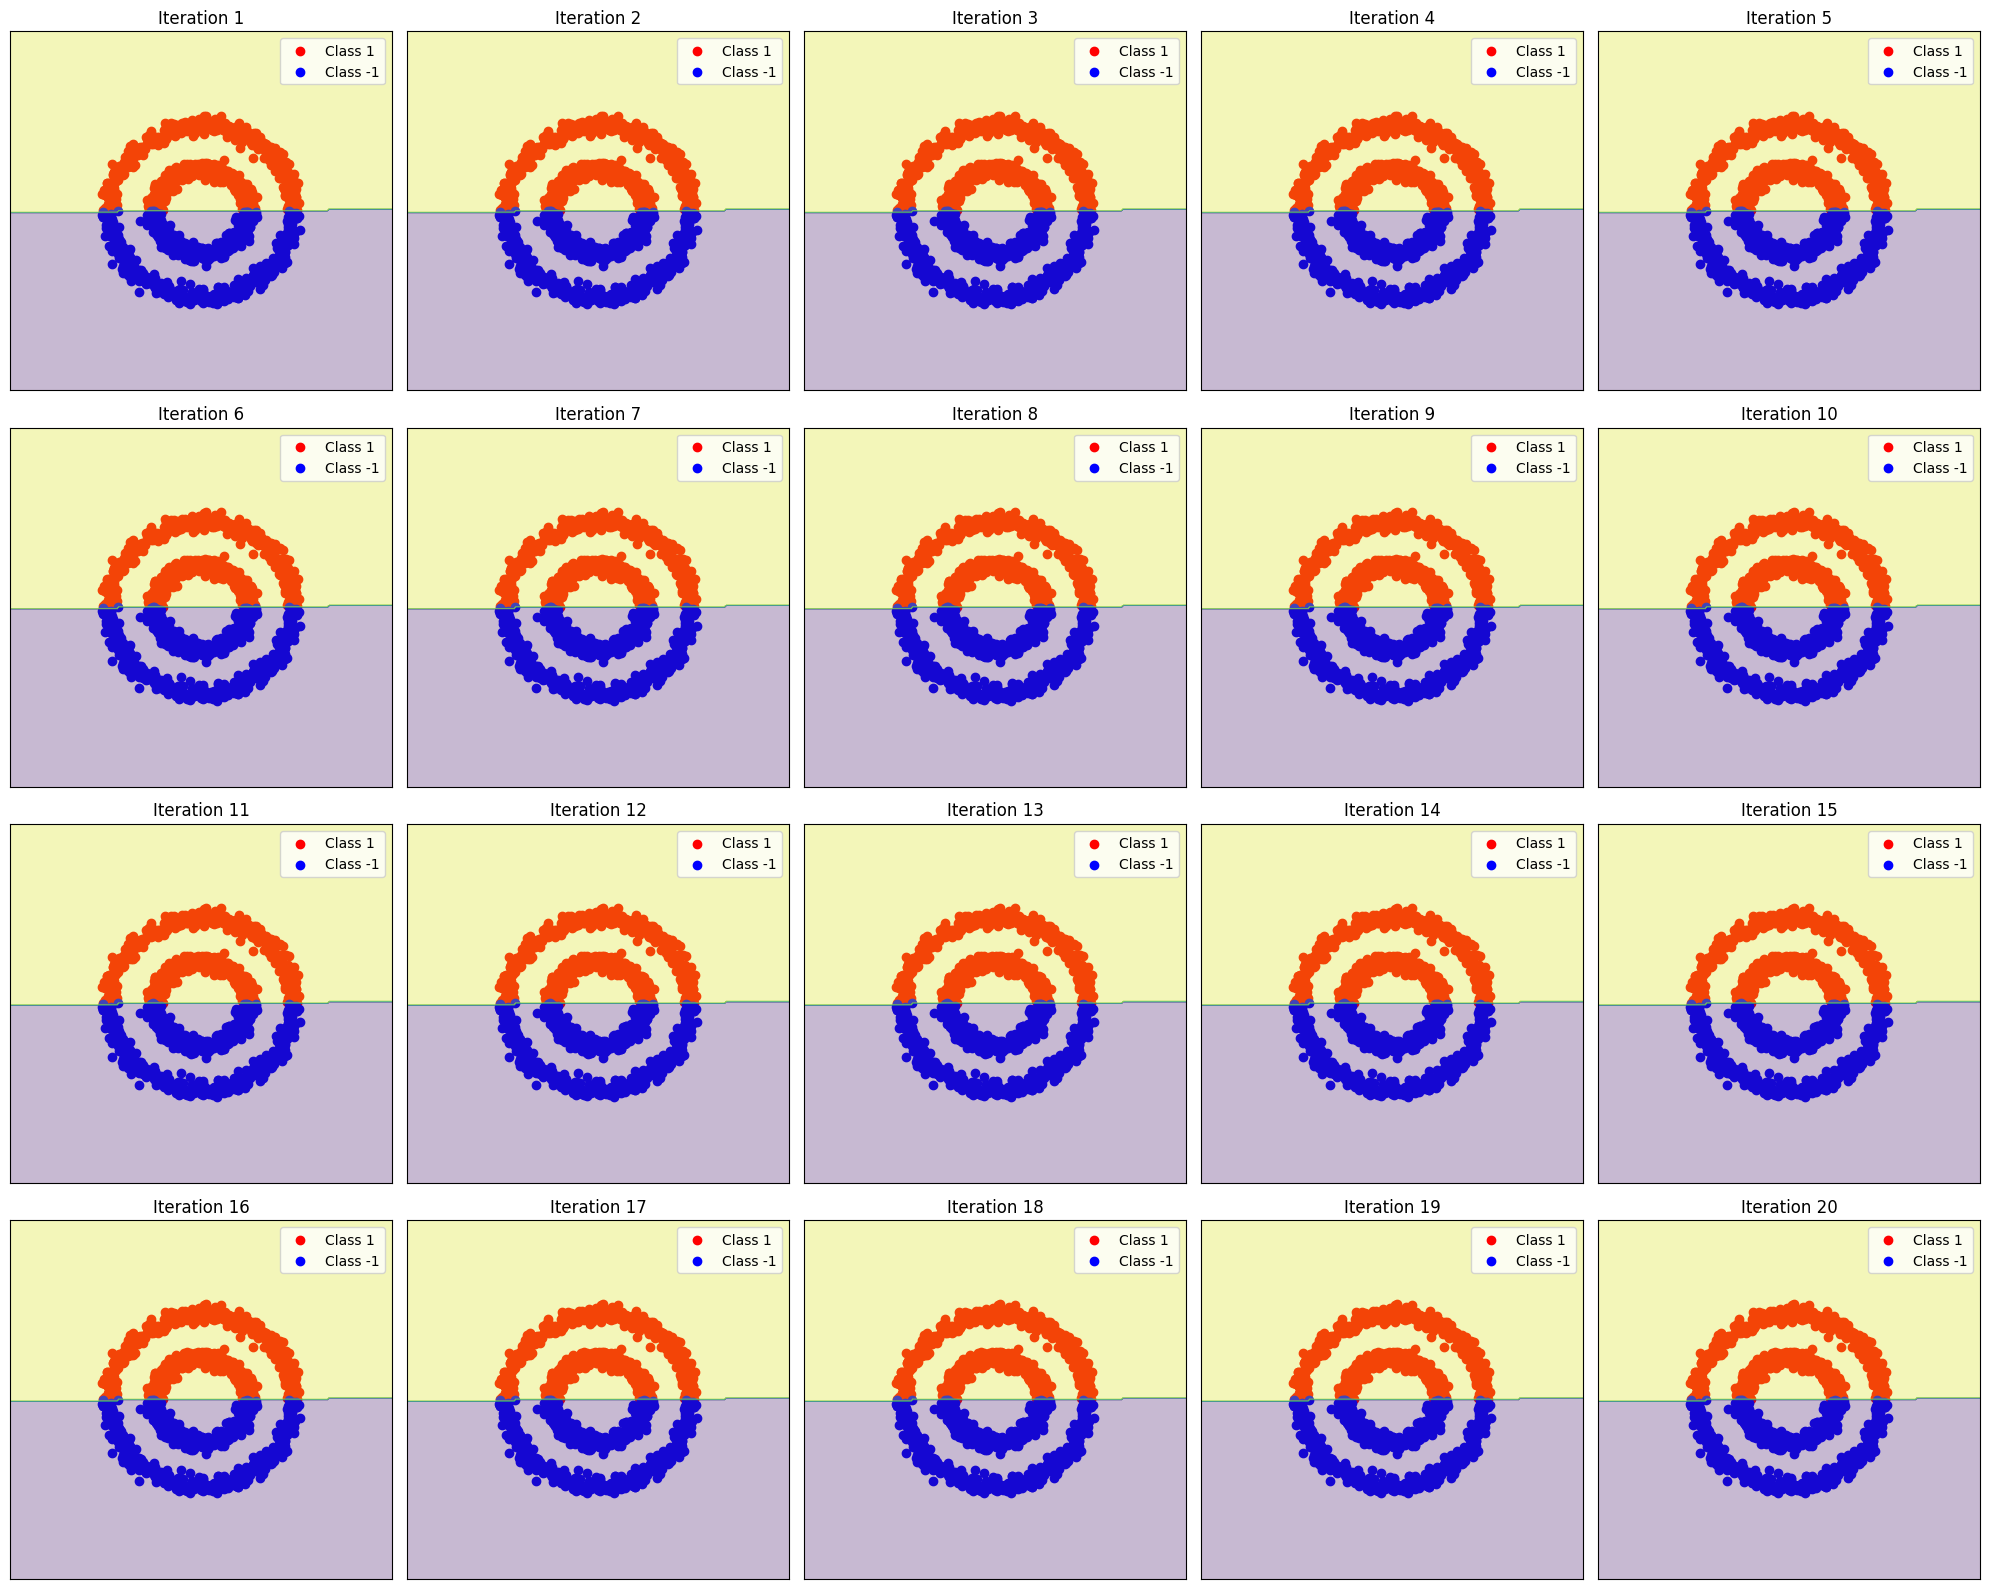

Accuracy: 99.67%


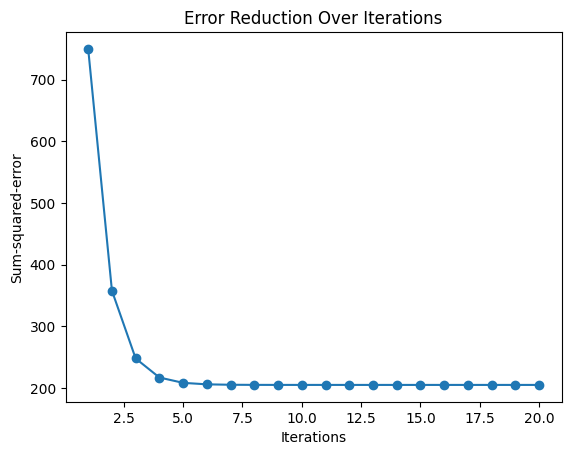

In [27]:
n_samples = 1500
X, y = make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=170)

y = np.where(X[:, 1] > 0, 1, -1)

X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y)

class Adaline:
    def __init__(self, learning_rate=0.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.errors_ = []

    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = torch.zeros(n_features, dtype=torch.float32)  # Correct initialization
        self.bias = torch.zeros(1, dtype=torch.float32)  # Bias initialization

        for iteration in range(self.n_iterations):
            # Compute the net input
            net_input = self.net_input(X)
            # Compute the errors
            errors = y - net_input.view(-1)  # Flatten net input for broadcasting
            # Update weights and bias
            self.weights += self.learning_rate * X.t().mm(errors.view(-1, 1)).view(-1)  # Shape alignment
            self.bias += self.learning_rate * errors.sum()
            # Compute cost
            cost = (errors ** 2).sum() / 2.0
            self.errors_.append(cost.item())

    def net_input(self, X):
        # Calculate the net input
        return X.mm(self.weights.view(-1, 1)) + self.bias  # Correct shape management

    def predict(self, X):
        # Make predictions
        return torch.where(self.net_input(X) >= 0.0, 1, -1)

    def plot_decision_boundary(self, X, y, ax, iteration):
        ax.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1')
        ax.scatter(X[y == -1, 0], X[y == -1, 1], color='blue', label='Class -1')
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
        Z = self.predict(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.view(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.3)
        ax.set_title(f"Iteration {iteration + 1}")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.legend()

adaline = Adaline(learning_rate=0.001, n_iterations=20)
adaline.fit(X_tensor, y_tensor)

fig, axs = plt.subplots(4, 5, figsize=(20, 16))  # 4 rows and 5 columns for 20 iterations
axs = axs.flatten()  # Flatten the 2D array of axes for easier indexing

for iteration in range(adaline.n_iterations):
    adaline.plot_decision_boundary(X_tensor.numpy(), y_tensor.numpy(), axs[iteration], iteration)

plt.tight_layout()
plt.show()

y_pred = adaline.predict(X_tensor)
correct_predictions = (y_pred.view(-1) == y_tensor).sum().item()
accuracy = correct_predictions / y_tensor.size(0) * 100
print(f"Accuracy: {accuracy:.2f}%")

plt.figure()
plt.plot(range(1, len(adaline.errors_) + 1), adaline.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.title("Error Reduction Over Iterations")
plt.show()

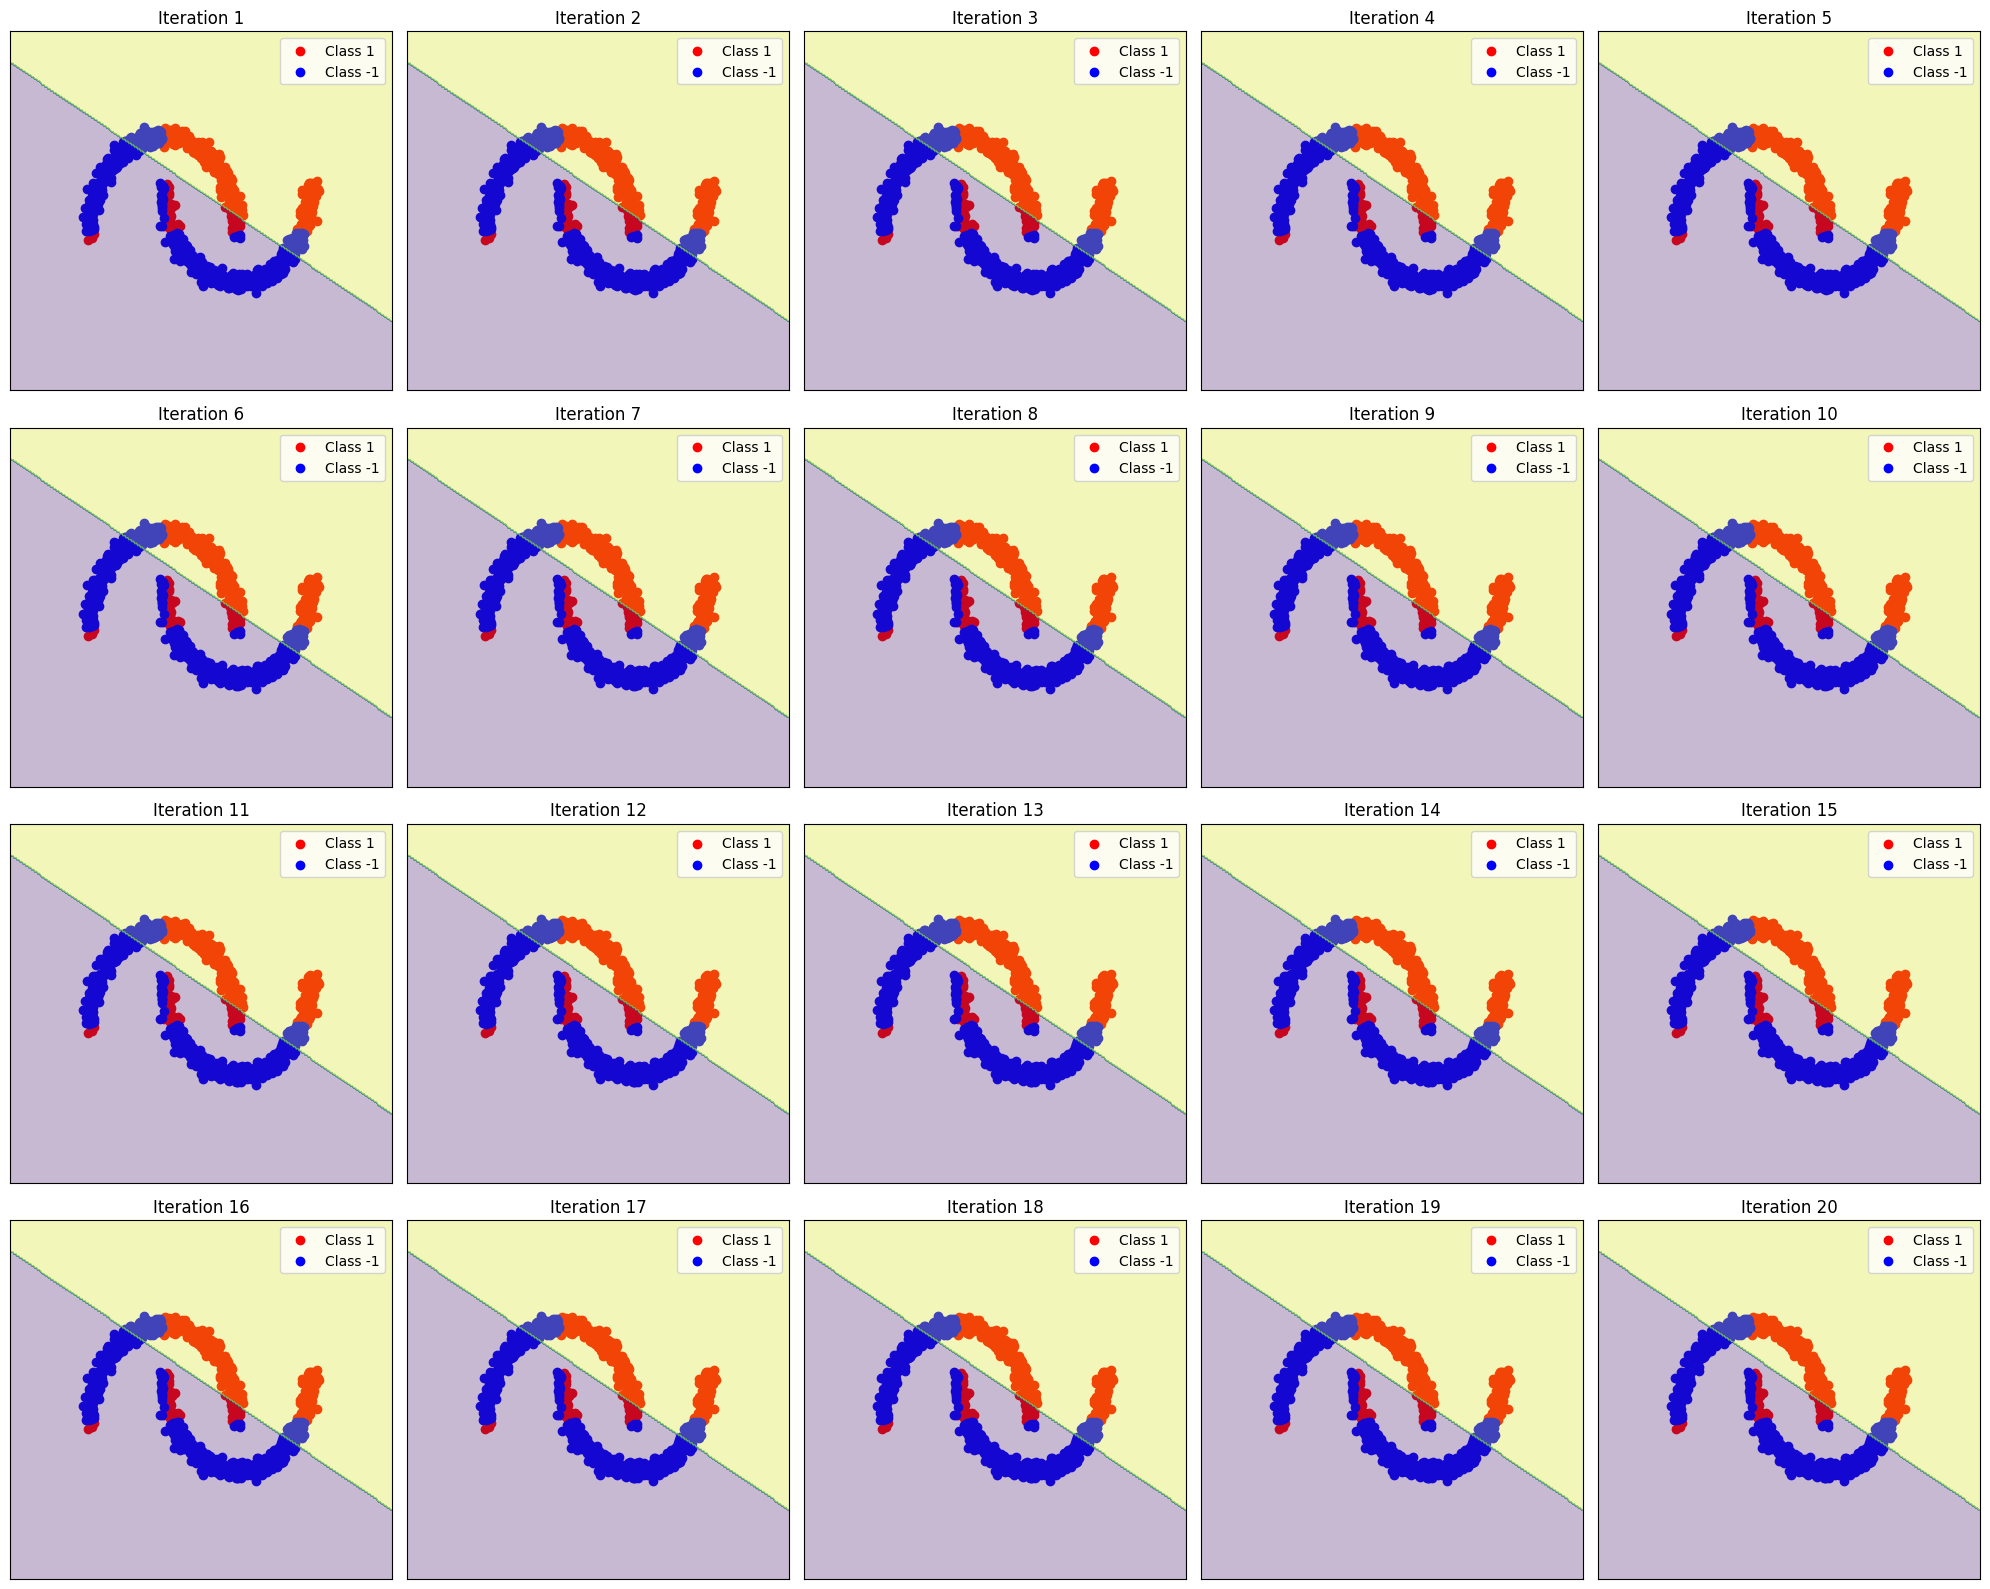

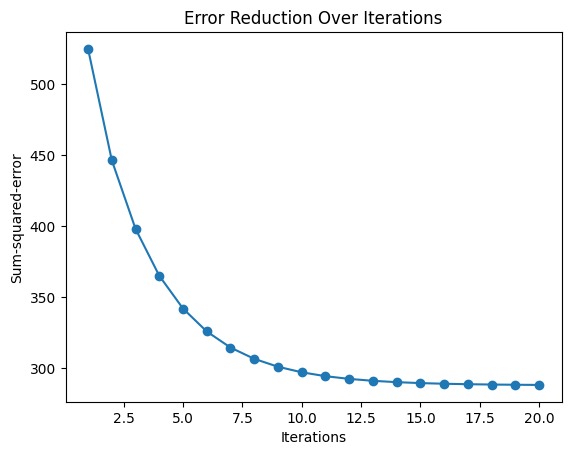

Test Accuracy: 79.00%


In [37]:
# Step 1: Generate the noisy circles dataset
n_samples = 1500
X, y = make_moons(n_samples=n_samples, noise=0.05, random_state=170)

# Use the second column of X for classification
y = np.where(X[:, 0] * X[:, 1] > 0, 1, -1)

# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)  # 70% train, 30% temp
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)  # 10% val, 20% test
# X_train_tensor = torch.FloatTensor(X_train)
# y_train_tensor = torch.FloatTensor(y_train)
# X_val_tensor = torch.FloatTensor(X_val)
# y_val_tensor = torch.FloatTensor(y_val)
# X_test_tensor = torch.FloatTensor(X_test)
# y_test_tensor = torch.FloatTensor(y_test)

X_train_tensor = torch.FloatTensor(X)
y_train_tensor = torch.FloatTensor(y)

class Adaline:
    def __init__(self, learning_rate=0.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.errors_ = []

    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = torch.zeros(n_features, dtype=torch.float32)  # Correct initialization
        self.bias = torch.zeros(1, dtype=torch.float32)  # Bias initialization

        for iteration in range(self.n_iterations):
            # Compute the net input
            net_input = self.net_input(X)
            # Compute the errors
            errors = y - net_input.view(-1)  # Flatten net input for broadcasting
            # Update weights and bias
            self.weights += self.learning_rate * X.t().mm(errors.view(-1, 1)).view(-1)  # Shape alignment
            self.bias += self.learning_rate * errors.sum()
            # Compute cost
            cost = (errors ** 2).sum() / 2.0
            self.errors_.append(cost.item())

    def net_input(self, X):
        # Calculate the net input
        return X.mm(self.weights.view(-1, 1)) + self.bias  # Correct shape management

    def predict(self, X):
        # Make predictions
        return torch.where(self.net_input(X) >= 0.0, 1, -1)

    def plot_decision_boundary(self, X, y, ax, iteration):
        ax.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1')
        ax.scatter(X[y == -1, 0], X[y == -1, 1], color='blue', label='Class -1')
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
        Z = self.predict(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.view(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.3)
        ax.set_title(f"Iteration {iteration + 1}")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.legend()

adaline = Adaline(learning_rate=0.001, n_iterations=20)  # Change iterations to 10
adaline.fit(X_train_tensor, y_train_tensor)

fig, axs = plt.subplots(4, 5, figsize=(20, 16))  # 2 rows and 5 columns for 10 iterations
axs = axs.flatten()  # Flatten the 2D array of axes for easier indexing

for iteration in range(adaline.n_iterations):
    adaline.plot_decision_boundary(X_train_tensor.numpy(), y_train_tensor.numpy(), axs[iteration], iteration)

plt.tight_layout()
plt.show()


plt.figure()
plt.plot(range(1, len(adaline.errors_) + 1), adaline.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.title("Error Reduction Over Iterations")
plt.show()

y_test_pred = adaline.predict(X_test_tensor)
test_accuracy = (y_test_pred.view(-1) == y_test_tensor).float().mean().item()
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Training on Moons dataset:
Epoch [0/200], Loss: 0.7342, Val Loss: 0.6889, Val Accuracy: 0.6733
Epoch [10/200], Loss: 0.4635, Val Loss: 0.4432, Val Accuracy: 0.8800
Epoch [20/200], Loss: 0.2606, Val Loss: 0.2696, Val Accuracy: 0.8800
Epoch [30/200], Loss: 0.2000, Val Loss: 0.2305, Val Accuracy: 0.8933
Epoch [40/200], Loss: 0.1592, Val Loss: 0.1940, Val Accuracy: 0.9000
Epoch [50/200], Loss: 0.1231, Val Loss: 0.1511, Val Accuracy: 0.9600
Epoch [60/200], Loss: 0.0802, Val Loss: 0.1013, Val Accuracy: 0.9667
Epoch [70/200], Loss: 0.0419, Val Loss: 0.0510, Val Accuracy: 0.9867
Epoch [80/200], Loss: 0.0209, Val Loss: 0.0256, Val Accuracy: 1.0000
Epoch [90/200], Loss: 0.0111, Val Loss: 0.0146, Val Accuracy: 1.0000
Epoch [100/200], Loss: 0.0067, Val Loss: 0.0093, Val Accuracy: 1.0000
Epoch [110/200], Loss: 0.0046, Val Loss: 0.0067, Val Accuracy: 1.0000
Epoch [120/200], Loss: 0.0035, Val Loss: 0.0052, Val Accuracy: 1.0000
Epoch [130/200], Loss: 0.0028, Val Loss: 0.0043, Val Accuracy: 1.0000
Epoc

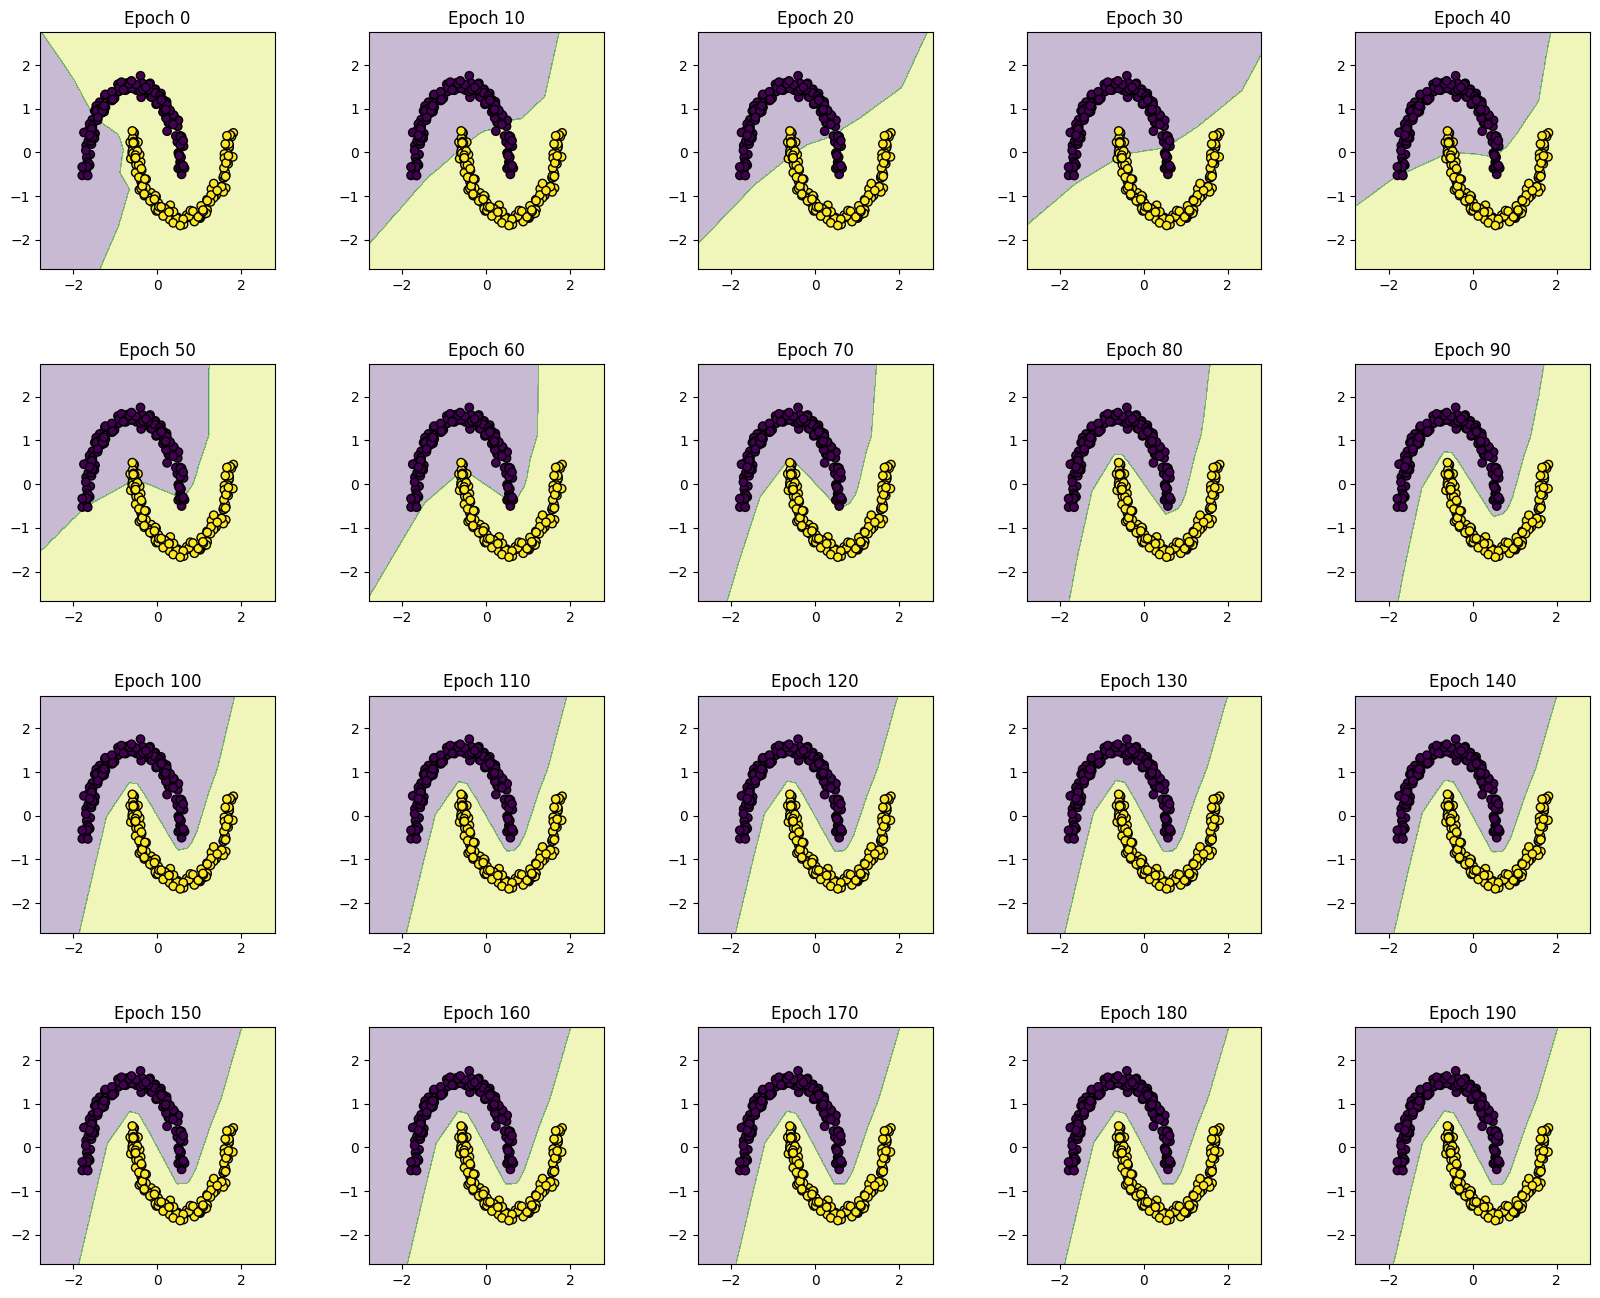

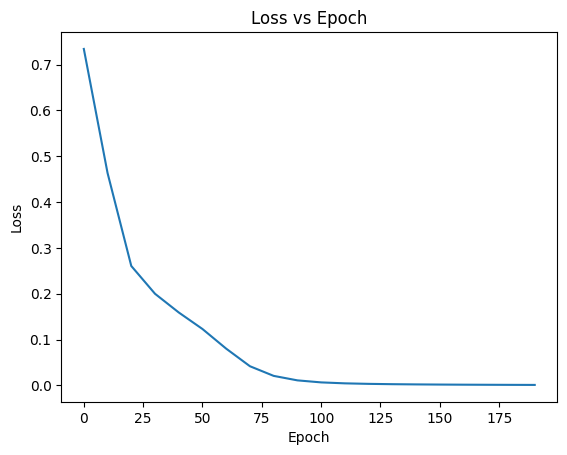

Training on Circles dataset:
Epoch [0/200], Loss: 0.7100, Val Loss: 0.7029, Val Accuracy: 0.5933
Epoch [10/200], Loss: 0.6618, Val Loss: 0.6682, Val Accuracy: 0.5467
Epoch [20/200], Loss: 0.5882, Val Loss: 0.5947, Val Accuracy: 0.7000
Epoch [30/200], Loss: 0.4723, Val Loss: 0.4910, Val Accuracy: 0.8400
Epoch [40/200], Loss: 0.3274, Val Loss: 0.3578, Val Accuracy: 0.8867
Epoch [50/200], Loss: 0.1694, Val Loss: 0.1804, Val Accuracy: 0.9667
Epoch [60/200], Loss: 0.0582, Val Loss: 0.0581, Val Accuracy: 1.0000
Epoch [70/200], Loss: 0.0214, Val Loss: 0.0224, Val Accuracy: 1.0000
Epoch [80/200], Loss: 0.0092, Val Loss: 0.0098, Val Accuracy: 1.0000
Epoch [90/200], Loss: 0.0050, Val Loss: 0.0053, Val Accuracy: 1.0000
Epoch [100/200], Loss: 0.0031, Val Loss: 0.0032, Val Accuracy: 1.0000
Epoch [110/200], Loss: 0.0023, Val Loss: 0.0024, Val Accuracy: 1.0000
Epoch [120/200], Loss: 0.0019, Val Loss: 0.0019, Val Accuracy: 1.0000
Epoch [130/200], Loss: 0.0016, Val Loss: 0.0016, Val Accuracy: 1.0000
Ep

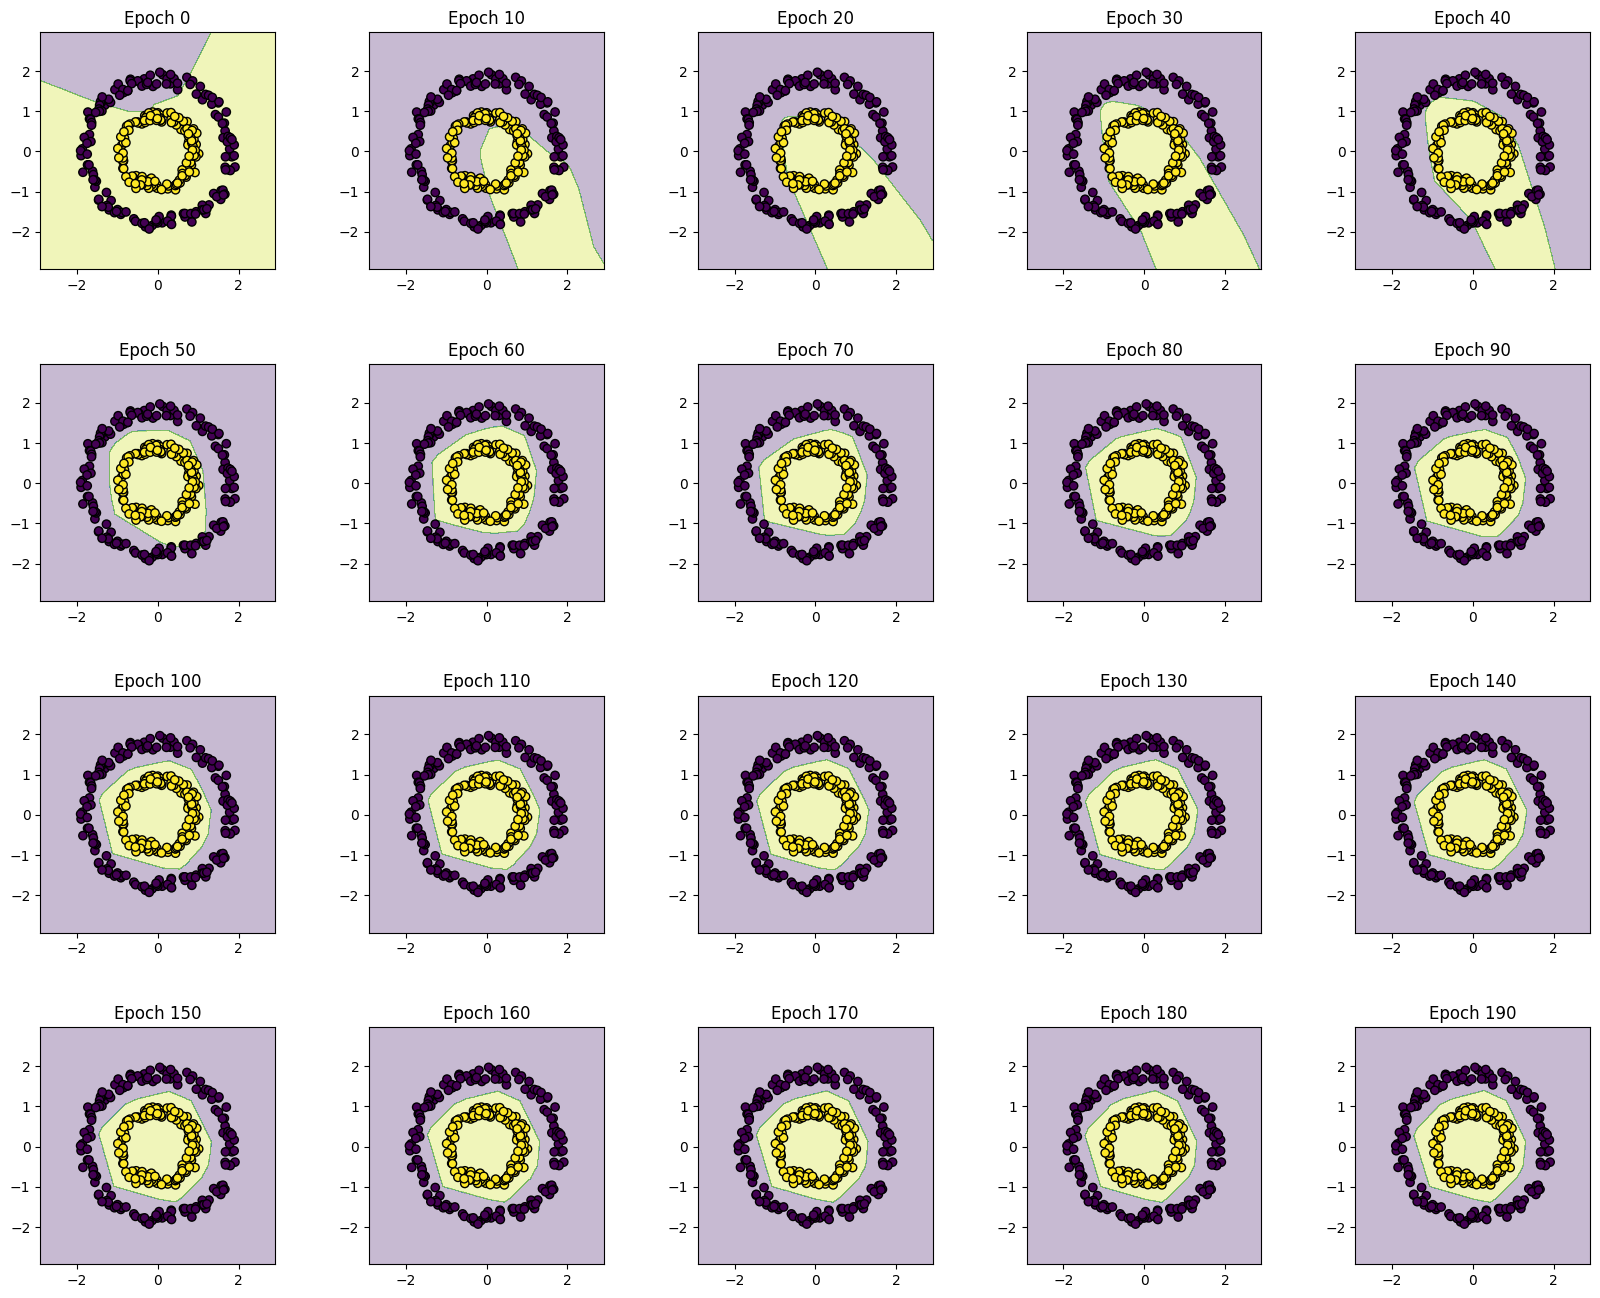

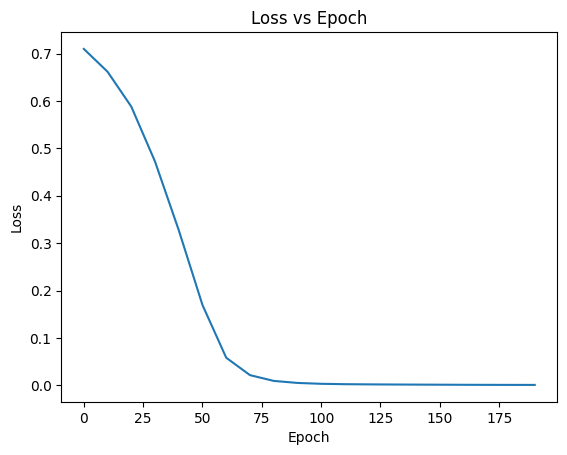

Evaluating Moons dataset:
Test Accuracy: 1.0000
Evaluating Circles dataset:
Test Accuracy: 1.0000
Plotting decision boundaries...


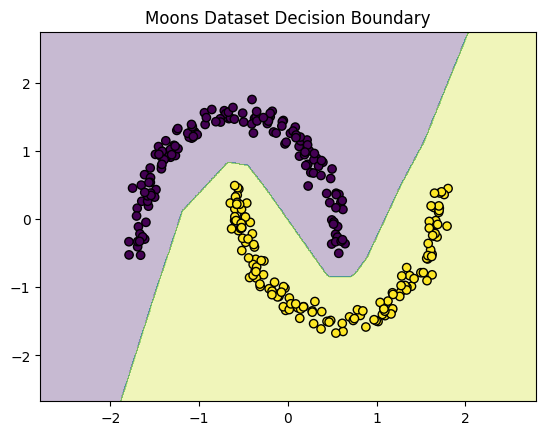

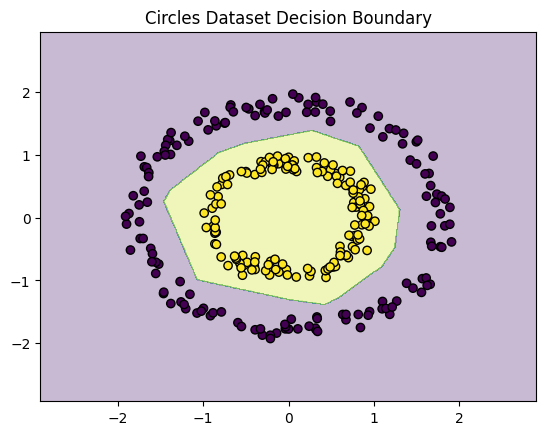

In [6]:
# Create non-linear datasets
n_samples = 1500
X_moons, y_moons = make_moons(n_samples=n_samples, noise=0.05, random_state=170)
X_circles, y_circles = make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=170)

scaler = StandardScaler()
X_moons = scaler.fit_transform(X_moons)
X_circles = scaler.fit_transform(X_circles)

# Split the data into train (70%), validation (10%), and test (20%) sets
def split_data(X, y):
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)  # 10% val, 20% test
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train_moons, X_val_moons, X_test_moons, y_train_moons, y_val_moons, y_test_moons = split_data(X_moons, y_moons)
X_train_circles, X_val_circles, X_test_circles, y_train_circles, y_val_circles, y_test_circles = split_data(X_circles, y_circles)

def convert_to_tensor(X_train, X_val, X_test, y_train, y_val, y_test):
    X_train = torch.tensor(X_train, dtype=torch.float32)
    X_val = torch.tensor(X_val, dtype=torch.float32)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.long)
    y_val = torch.tensor(y_val, dtype=torch.long)
    y_test = torch.tensor(y_test, dtype=torch.long)
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train_moons, X_val_moons, X_test_moons, y_train_moons, y_val_moons, y_test_moons = convert_to_tensor(
    X_train_moons, X_val_moons, X_test_moons, y_train_moons, y_val_moons, y_test_moons)

X_train_circles, X_val_circles, X_test_circles, y_train_circles, y_val_circles, y_test_circles = convert_to_tensor(
    X_train_circles, X_val_circles, X_test_circles, y_train_circles, y_val_circles, y_test_circles)

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden1 = nn.Linear(2, 10)
        self.hidden2 = nn.Linear(10, 10)
        self.output = nn.Linear(10, 2)  # Two output classes for binary classification

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = self.output(x)
        return x

import matplotlib.pyplot as plt
import numpy as np

def train_model_with_plot(model, optimizer, criterion, X_train, y_train, X_val, y_val, X_test, y_test, epochs=200):
    # For storing loss and epoch data
    losses = []

    # Create a figure with 20 subplots (4x5 grid)
    fig, axs = plt.subplots(4, 5, figsize=(20, 16))
    plt.subplots_adjust(hspace=0.4, wspace=0.4)

    for epoch in range(epochs):
        # Forward pass
        model.train()
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, y_train)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Store the loss value after every 10 epochs
        if epoch % 10 == 0:
            losses.append(loss.item())

            # Validation accuracy
            model.eval()
            with torch.no_grad():
                val_output = model(X_val)
                val_loss = criterion(val_output, y_val)
                val_preds = torch.argmax(val_output, dim=1)
                val_accuracy = (val_preds == y_val).float().mean()

            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy:.4f}')

            # Plot decision boundary every 10 epochs
            ax = axs[epoch // 10 // 5, epoch // 10 % 5]  # Access subplot in grid (4x5)
            plot_decision_boundary(X_test.numpy(), y_test.numpy(), model, f'Epoch {epoch}', ax)

    # Plot the loss over time
    plt.figure()
    plt.plot(np.arange(0, epochs, 10), losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch')
    plt.show()

def plot_decision_boundary(X, y, model, title, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32))
    Z = torch.argmax(Z, dim=1).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    ax.set_title(title)

def initialize_and_train_with_plots(X_train, y_train, X_val, y_val, X_test, y_test):
    model = MLP()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.CrossEntropyLoss()
    train_model_with_plot(model, optimizer, criterion, X_train, y_train, X_val, y_val, X_test, y_test, epochs=200)
    return model

print("Training on Moons dataset:")
model_moons = initialize_and_train_with_plots(X_train_moons, y_train_moons, X_val_moons, y_val_moons, X_test_moons, y_test_moons)

print("Training on Circles dataset:")
model_circles = initialize_and_train_with_plots(X_train_circles, y_train_circles, X_val_circles, y_val_circles, X_test_circles, y_test_circles)


def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        output = model(X_test)
        preds = torch.argmax(output, dim=1)
        accuracy = (preds == y_test).float().mean()
    print(f'Test Accuracy: {accuracy:.4f}')
    return accuracy

print("Evaluating Moons dataset:")
evaluate_model(model_moons, X_test_moons, y_test_moons)

print("Evaluating Circles dataset:")
evaluate_model(model_circles, X_test_circles, y_test_circles)

def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32))
    Z = torch.argmax(Z, dim=1).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.show()

print("Plotting decision boundaries...")
plot_decision_boundary(X_test_moons.numpy(), y_test_moons.numpy(), model_moons, 'Moons Dataset Decision Boundary')
plot_decision_boundary(X_test_circles.numpy(), y_test_circles.numpy(), model_circles, 'Circles Dataset Decision Boundary')
